
Digit Recognition using Lasso Logistic Cross validation

In [1]:
from sklearn.datasets import fetch_openml
X,y=fetch_openml('mnist_784',version=1,return_X_y=True, as_frame=False)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

In [4]:
from sklearn.model_selection import train_test_split
y=[int(i) for i in y]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/7.0,random_state=0)

In [5]:
X_test[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  32., 14

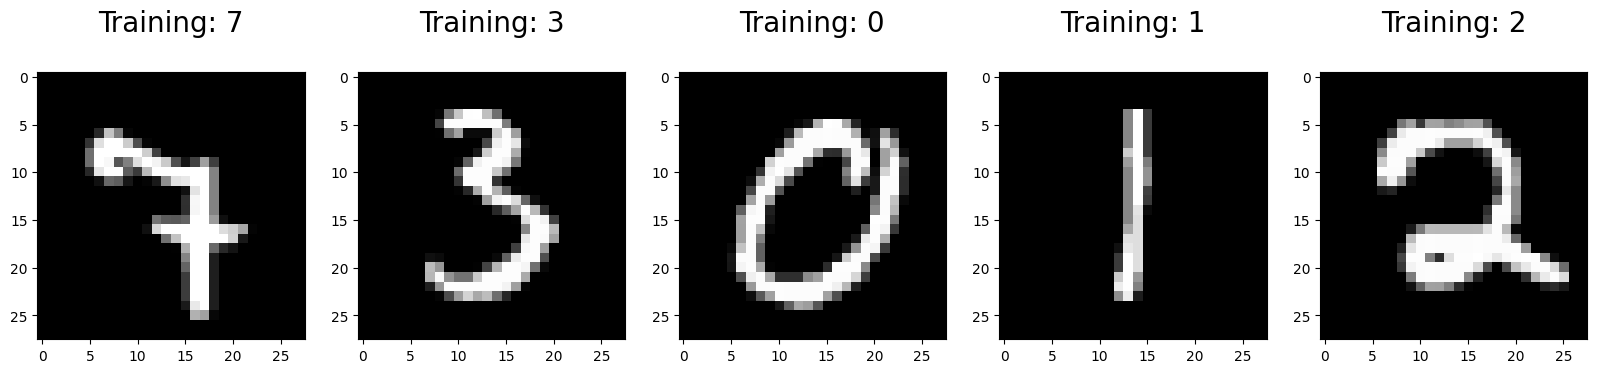

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [7]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X, y)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [ ]:
pred=clf.predict(X_test)
pred

array([0, 4, 1, ..., 1, 3, 0])

In [ ]:
clf.score(X_test,y_test)

0.9342

In [ ]:
p=pred==y_test

In [ ]:
import collections
def CountFrequency(arr):
	return collections.Counter(arr)
if __name__ == "__main__":
	freq = CountFrequency(p)
	for (key, value) in freq.items():
		print (key, " -> ", value)


True  ->  9342
False  ->  658


In [ ]:
index = 0
misclassified_images = []
classified_images = []
for label, predict in zip(y_test, pred):
    if label != predict: 
        misclassified_images.append(index)
    else:
        classified_images.append(index)
    index +=1
    
    if len(misclassified_images) == 10:
        break

In [ ]:
classified_images[1]

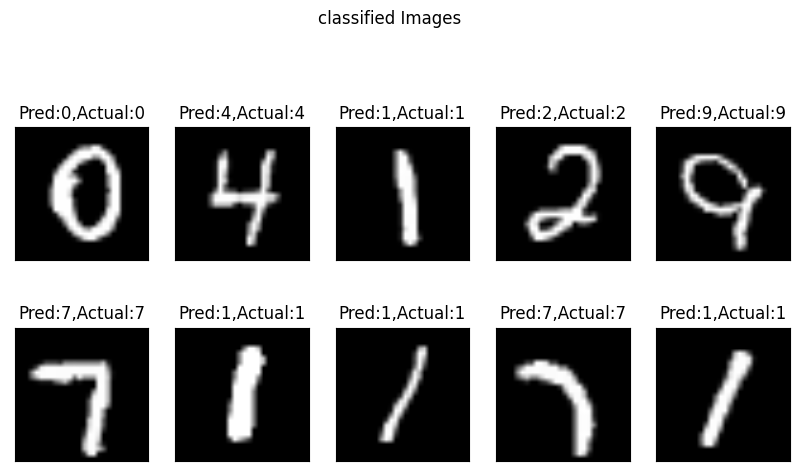

In [ ]:
plt.figure(figsize=(10,10))
plt.suptitle('classified Images')
for plot_index,bad_index in enumerate(classified_images[:10]):
    p=plt.subplot(4,5,plot_index+1)
    p.imshow(X_test[bad_index].reshape(28,28), cmap=plt.cm.gray, interpolation='bilinear')
    p.set_yticks(())
    p.set_xticks(())
    p.set_title(f'Pred:{pred[bad_index]},Actual:{y_test[bad_index]}')

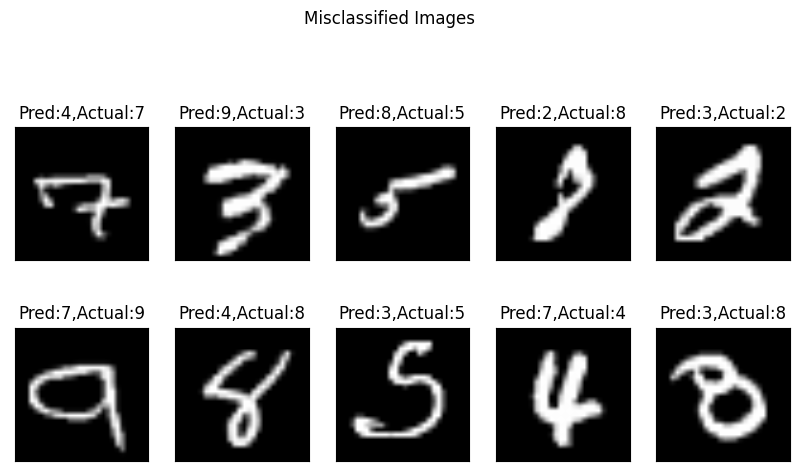

In [ ]:
plt.figure(figsize=(10,10))
plt.suptitle('Misclassified Images')
for plot_index,bad_index in enumerate(misclassified_images):
    p=plt.subplot(4,5,plot_index+1)
    p.imshow(X_test[bad_index].reshape(28,28), cmap=plt.cm.gray, interpolation='bilinear')
    p.set_yticks(())
    p.set_xticks(())
    p.set_title(f'Pred:{pred[bad_index]},Actual:{y_test[bad_index]}')